In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import cmap
import cartopy.feature as cFeature

## Plot global temperature and precipitation data

The script below generates global differences in mean temperature between the periods 2015-01-01 to 2035-01-01 and 2040-01-01 to 2060-01-01, for the climate model MRI-ESM2-0 in SSP2-4.5.

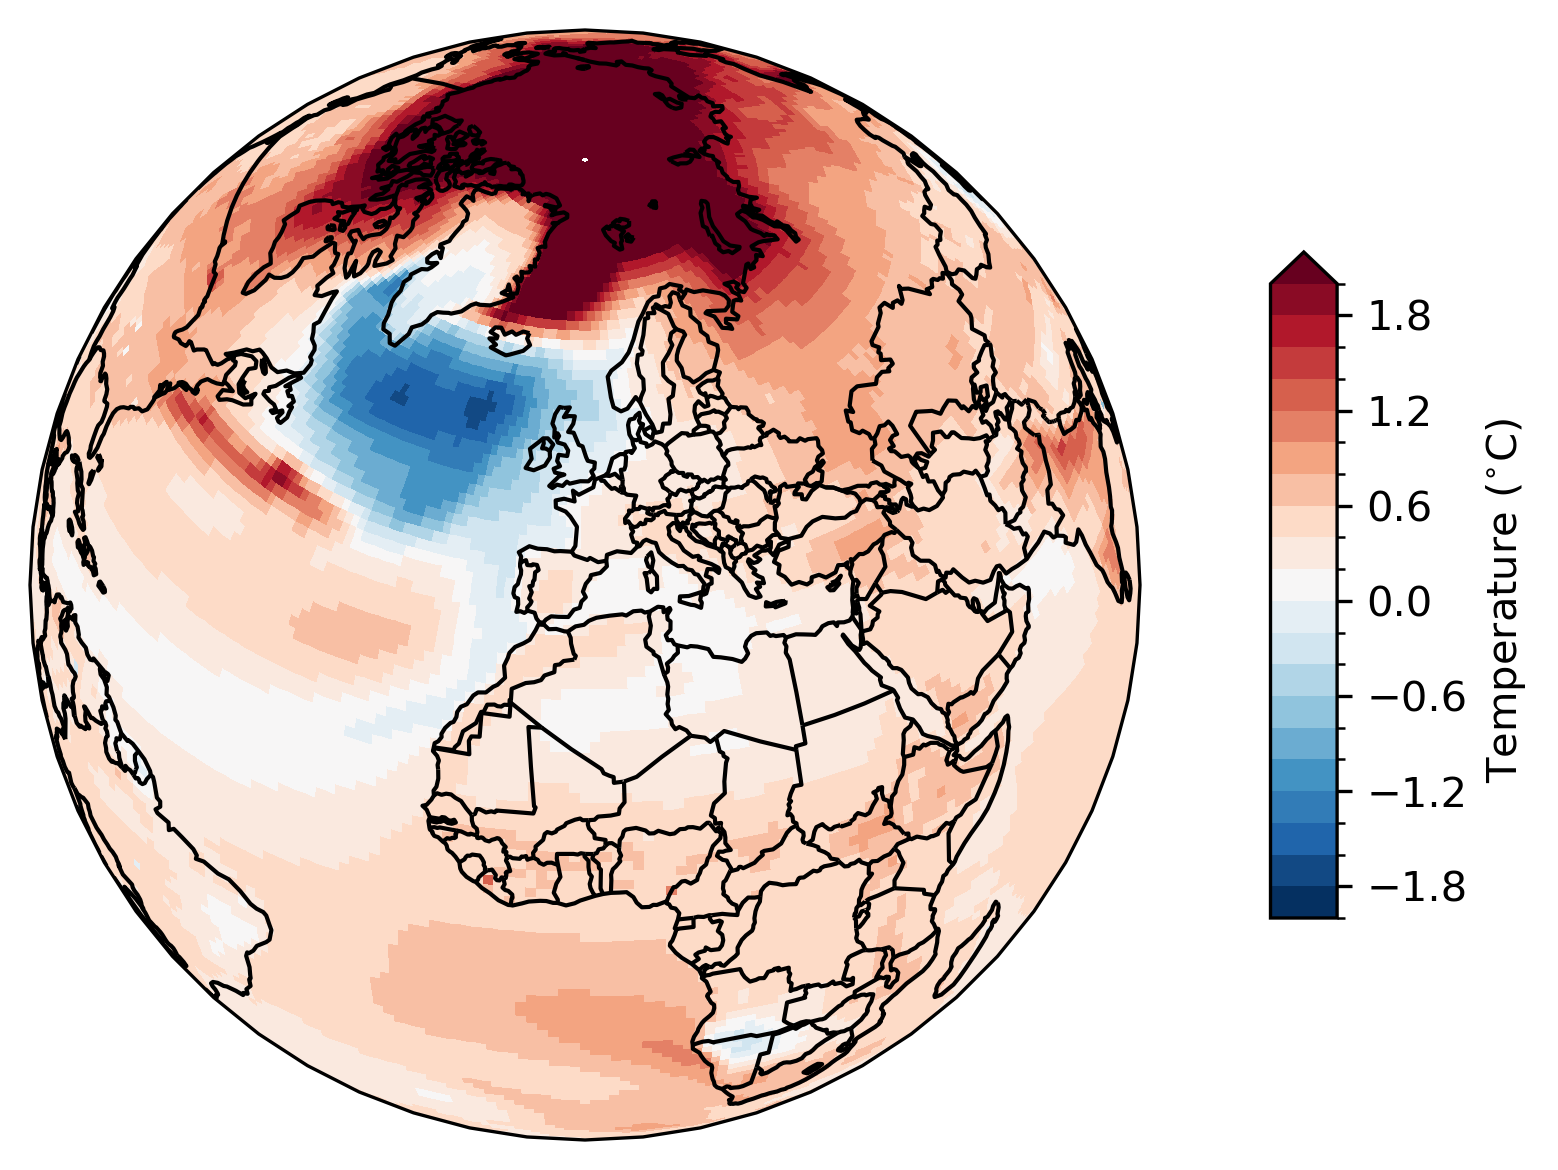

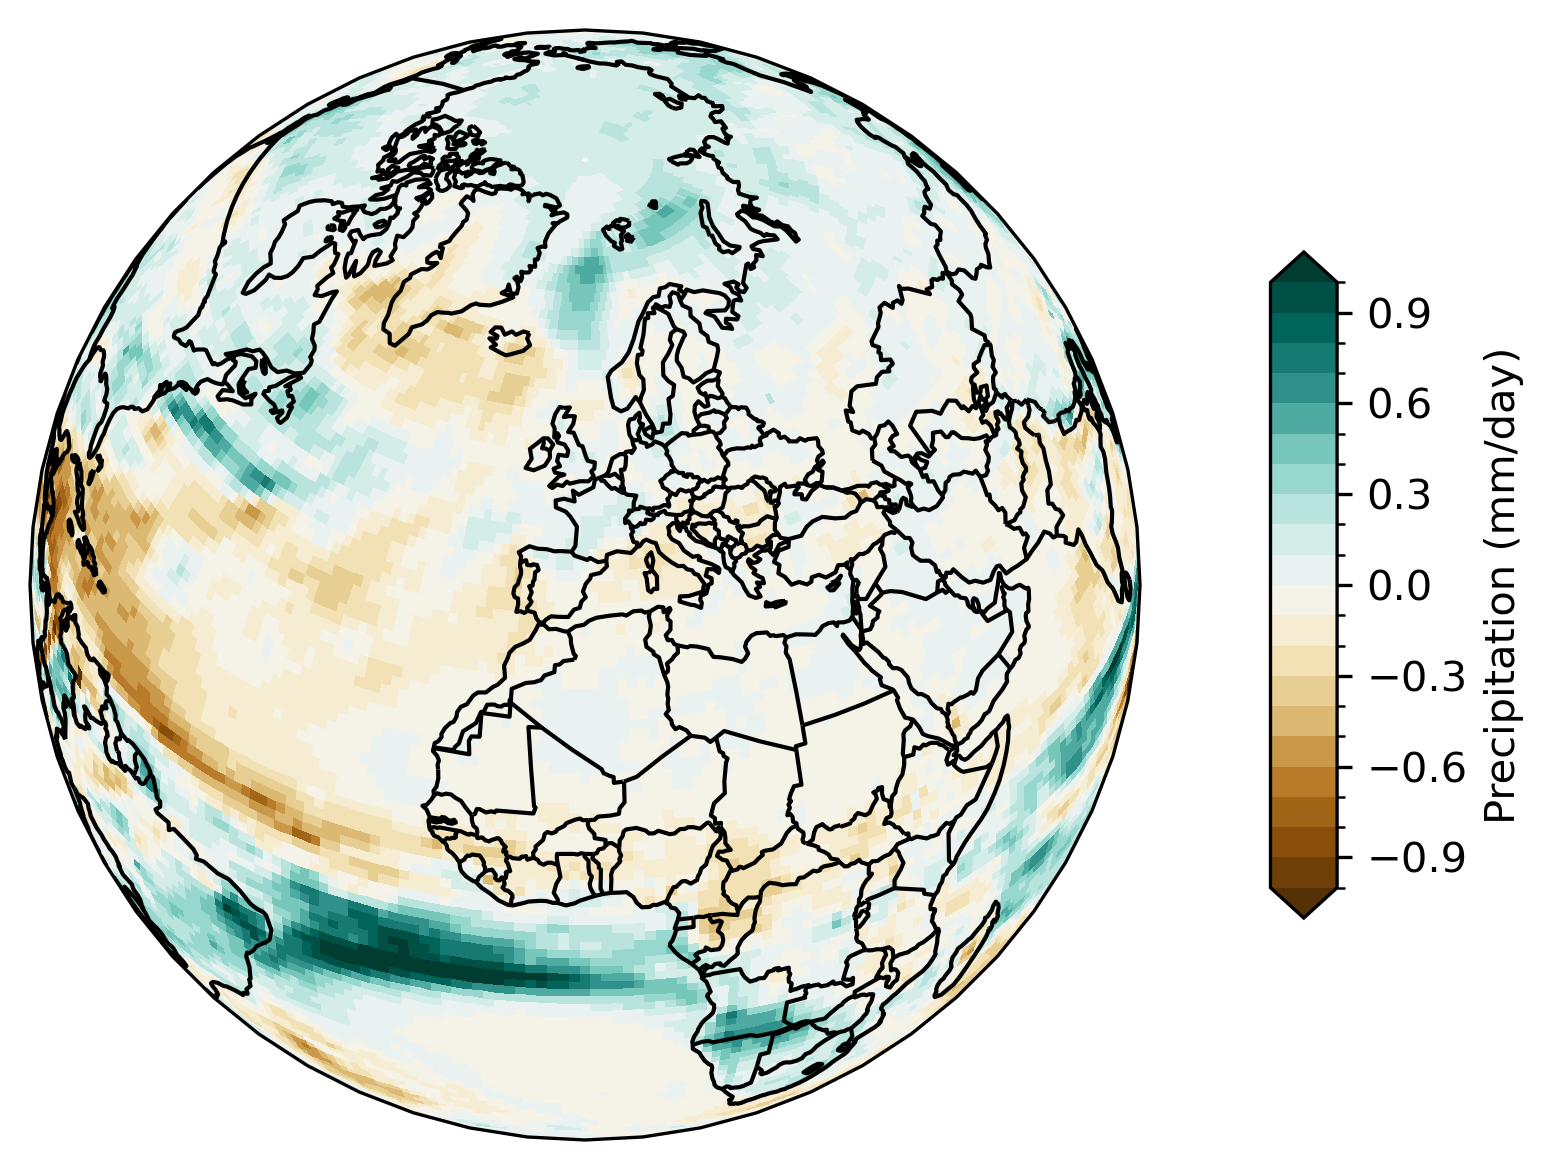

In [56]:
# Plot temperature

model_scenario_name = 'MRI-ESM2-0_ssp245'
start_time = '2015-01-01'; end_time = '2060-01-01'
data_folder = '../CMIP6_data/'
files = glob.glob(data_folder+'tas_day_'+model_scenario_name+'*')
files.sort()
SPG_ds = xr.open_mfdataset(files)


lmax_tas = 2
levels = np.linspace(-lmax_tas, lmax_tas, 21)
fig = plt.figure(figsize=[9, 4], dpi=300)
ax = plt.axes(projection=ccrs.Orthographic(0,40))
SPG_mean_pre = SPG_ds.tas.sel(time=slice('2020-01-01', '2040-01-01')).mean('time')
SPG_mean_post = SPG_ds.tas.sel(time=slice('2040-01-01', '2060-01-01')).mean('time')
diff = SPG_mean_post-SPG_mean_pre


map = diff.plot(ax=ax, 
            transform=ccrs.PlateCarree(),levels=levels, cmap='RdBu_r',
            cbar_kwargs={'orientation':'vertical','shrink':0.6, 'aspect':10,'label':'Temperature ($^{\circ}$C)'})
ax.coastlines()
ax.add_feature(cFeature.BORDERS)
ax.set_title('')
fig.tight_layout()
plt.show()

# Plot precipitation

files = glob.glob(data_folder+'pr_day_'+model_scenario_name+'*')
files.sort()
SPG_ds = xr.open_mfdataset(files)


lmax_pr = 1
levels = np.linspace(-lmax_pr, lmax_pr, 21)
fig = plt.figure(figsize=[9, 4], dpi=300)
ax = plt.axes(projection=ccrs.Orthographic(0,40))
SPG_mean_pre = SPG_ds.pr.sel(time=slice('2020-01-01', '2040-01-01')).mean('time')
SPG_mean_post = SPG_ds.pr.sel(time=slice('2040-01-01', '2060-01-01')).mean('time')
diff = (SPG_mean_post-SPG_mean_pre)*24*60*60


map = diff.plot(ax=ax, 
            transform=ccrs.PlateCarree(),levels=levels, cmap='BrBG',
            cbar_kwargs={'orientation':'vertical','shrink':0.6, 'aspect':10,'label':'Precipitation (mm/day)'})
ax.coastlines()
ax.add_feature(cFeature.BORDERS)
ax.set_title('')
fig.tight_layout()
plt.show()


The script below generates global differences in mean temperature between the periods 2015-01-01 to 2035-01-01 and 2040-01-01 to 2060-01-01, for the climate model MPI-ESM1-2-LR in SSP2-4.5.

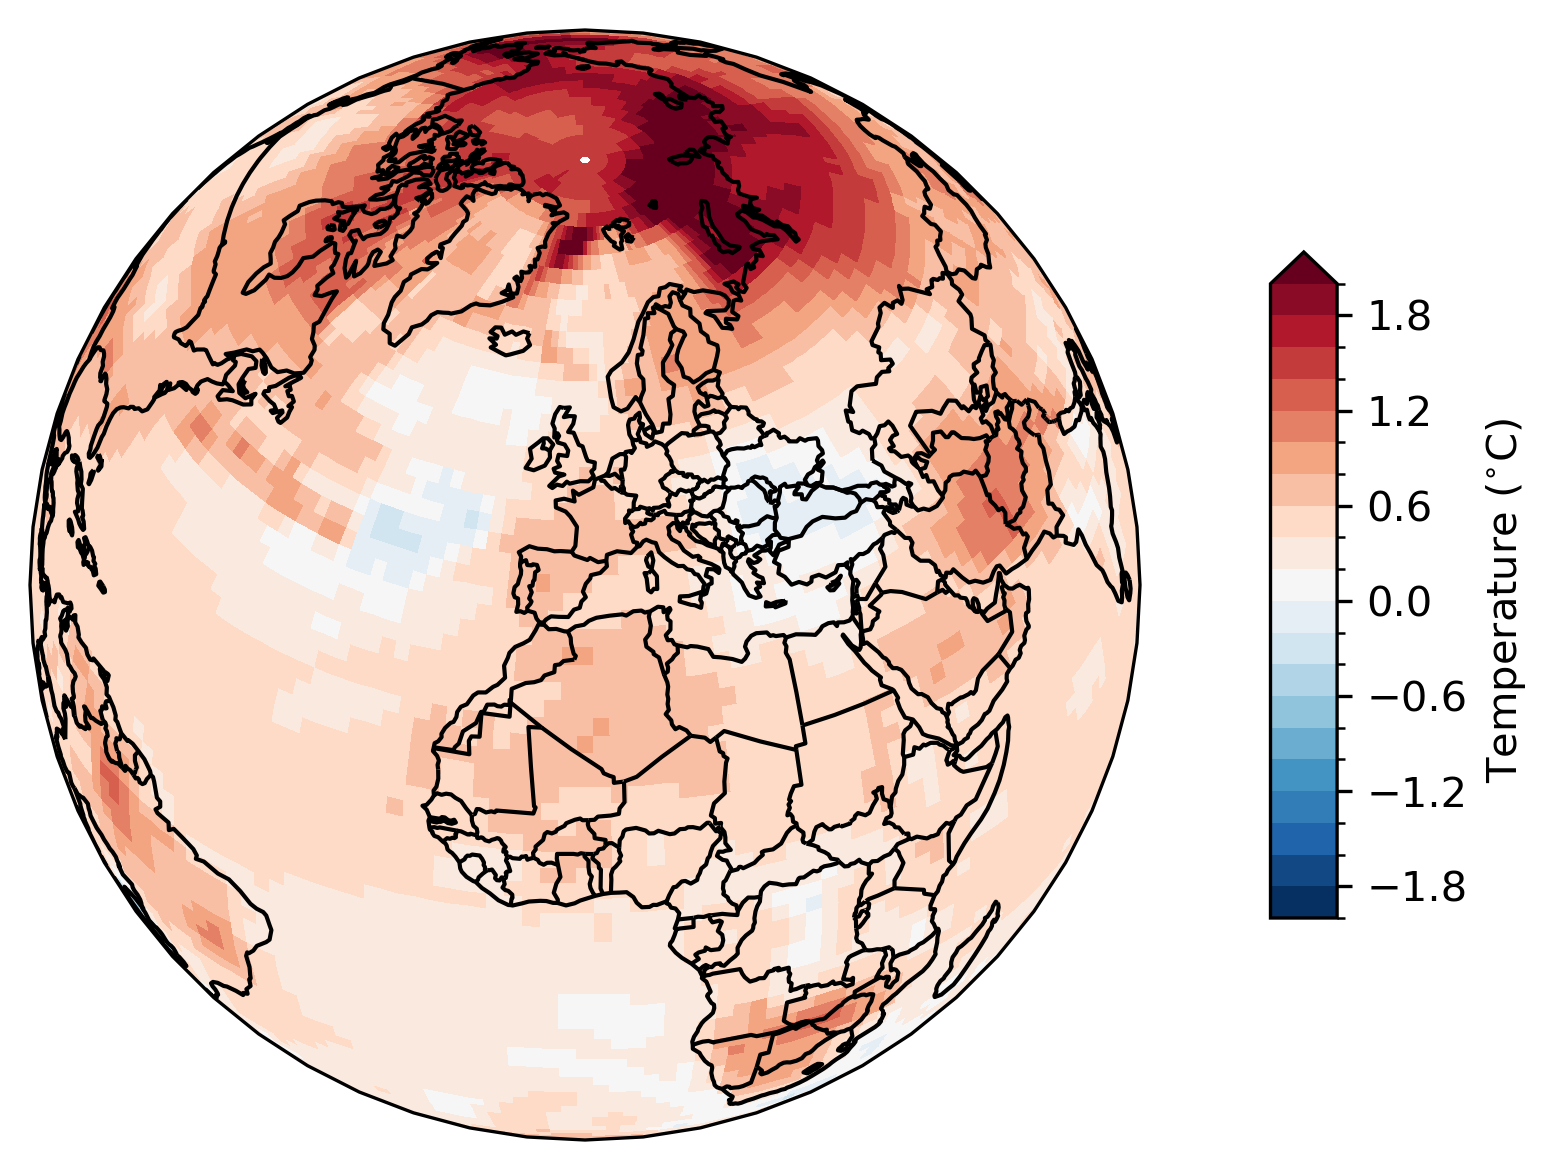

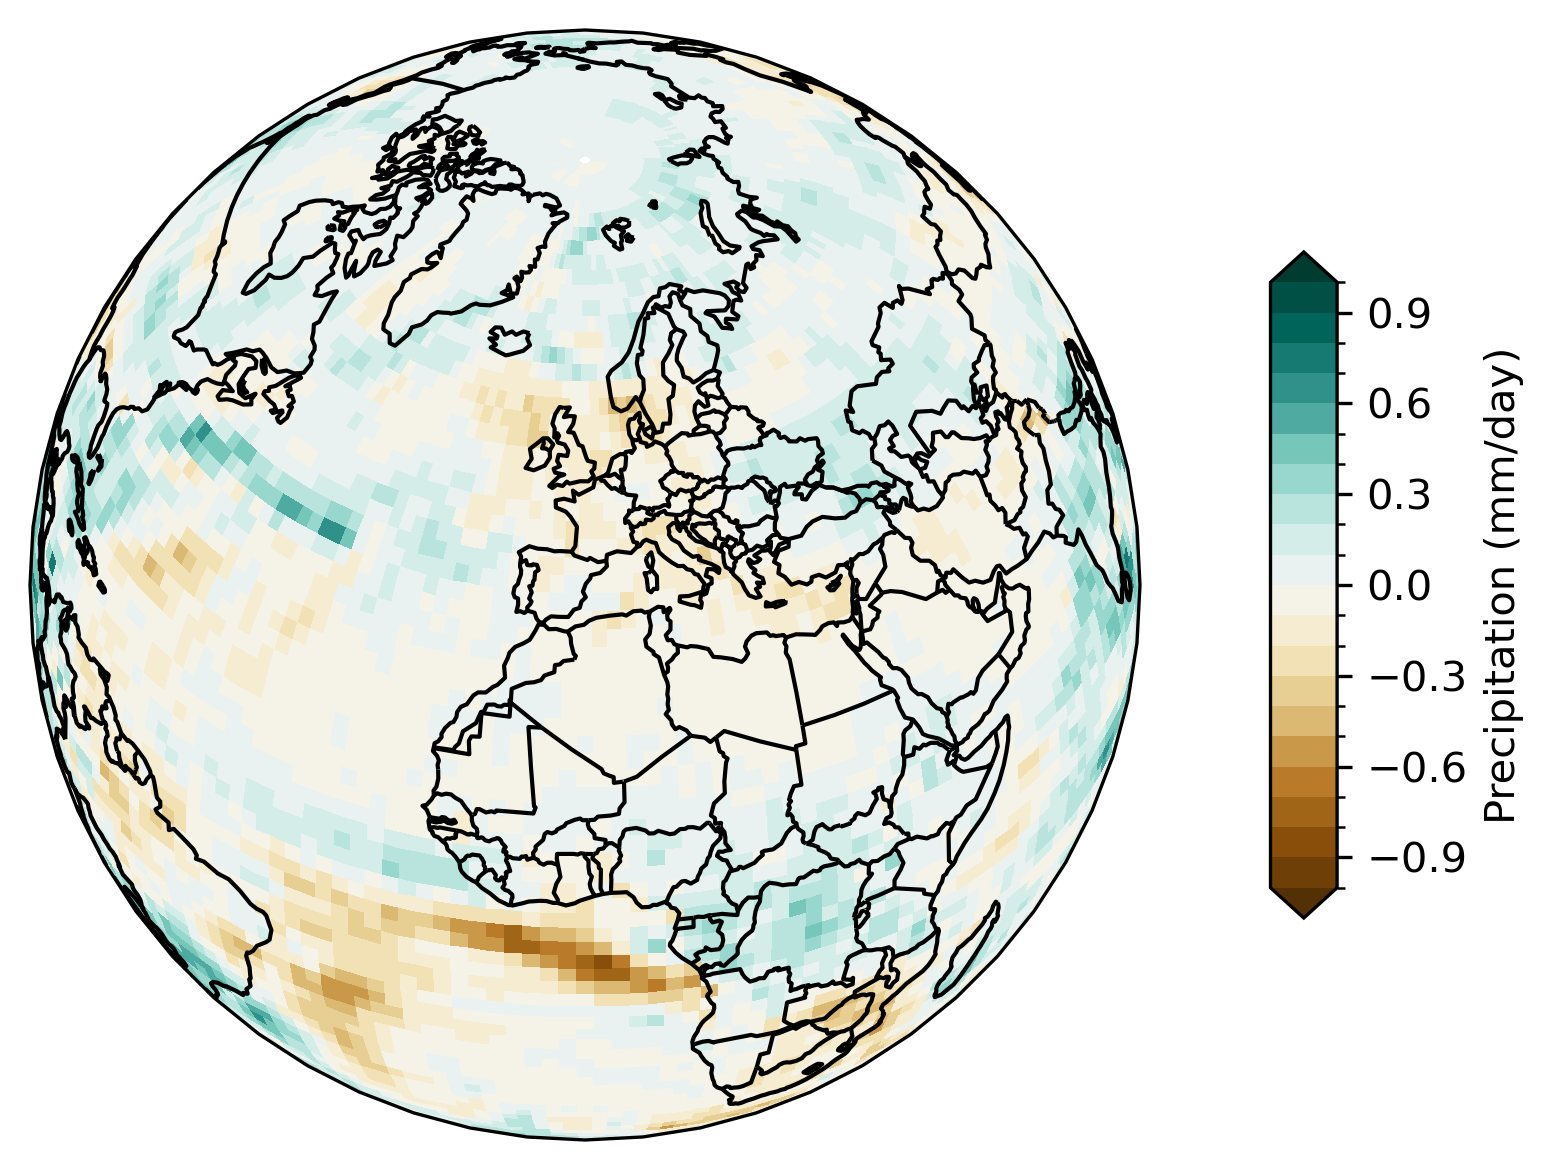

In [57]:
# Plot temperature

model_scenario_name = 'MPI-ESM1-2-LR_ssp245'
data_folder = '../CMIP6_data/'
files = glob.glob(data_folder+'tas_day_'+model_scenario_name+'*')
files.sort()
non_SPG_ds = xr.open_mfdataset(files)


lmax_tas = 2
levels = np.linspace(-lmax_tas, lmax_tas, 21)
fig = plt.figure(figsize=[9, 4], dpi=300)
ax = plt.axes(projection=ccrs.Orthographic(0,40))
non_SPG_mean_pre = non_SPG_ds.tas.sel(time=slice('2020-01-01', '2040-01-01')).mean('time')
non_SPG_mean_post = non_SPG_ds.tas.sel(time=slice('2040-01-01', '2060-01-01')).mean('time')
diff = non_SPG_mean_post-non_SPG_mean_pre

map = diff.plot(ax=ax, 
            transform=ccrs.PlateCarree(),levels=levels, cmap='RdBu_r',
            cbar_kwargs={'orientation':'vertical','shrink':0.6, 'aspect':10,'label':'Temperature ($^{\circ}$C)'})
ax.coastlines()
ax.add_feature(cFeature.BORDERS)
ax.set_title('')
fig.tight_layout()
plt.show()

# Plot precipitation

files = glob.glob(data_folder+'pr_day_'+model_scenario_name+'*')
files.sort()
non_SPG_ds = xr.open_mfdataset(files)


lmax_pr = 1
levels = np.linspace(-lmax_pr, lmax_pr, 21)
fig = plt.figure(figsize=[9, 4], dpi=300)
ax = plt.axes(projection=ccrs.Orthographic(0,40))
non_SPG_mean_pre = non_SPG_ds.pr.sel(time=slice('2020-01-01', '2040-01-01')).mean('time')
non_SPG_mean_post = non_SPG_ds.pr.sel(time=slice('2040-01-01', '2060-01-01')).mean('time')
diff = (non_SPG_mean_post-non_SPG_mean_pre)*24*60*60


map = diff.plot(ax=ax, 
            transform=ccrs.PlateCarree(),levels=levels, cmap='BrBG',
            cbar_kwargs={'orientation':'vertical','shrink':0.6, 'aspect':10,'label':'Precipitation (mm/day)'})
ax.coastlines()
ax.add_feature(cFeature.BORDERS)
ax.set_title('')
fig.tight_layout()
plt.show()

## Plot growing degree days and growing season length

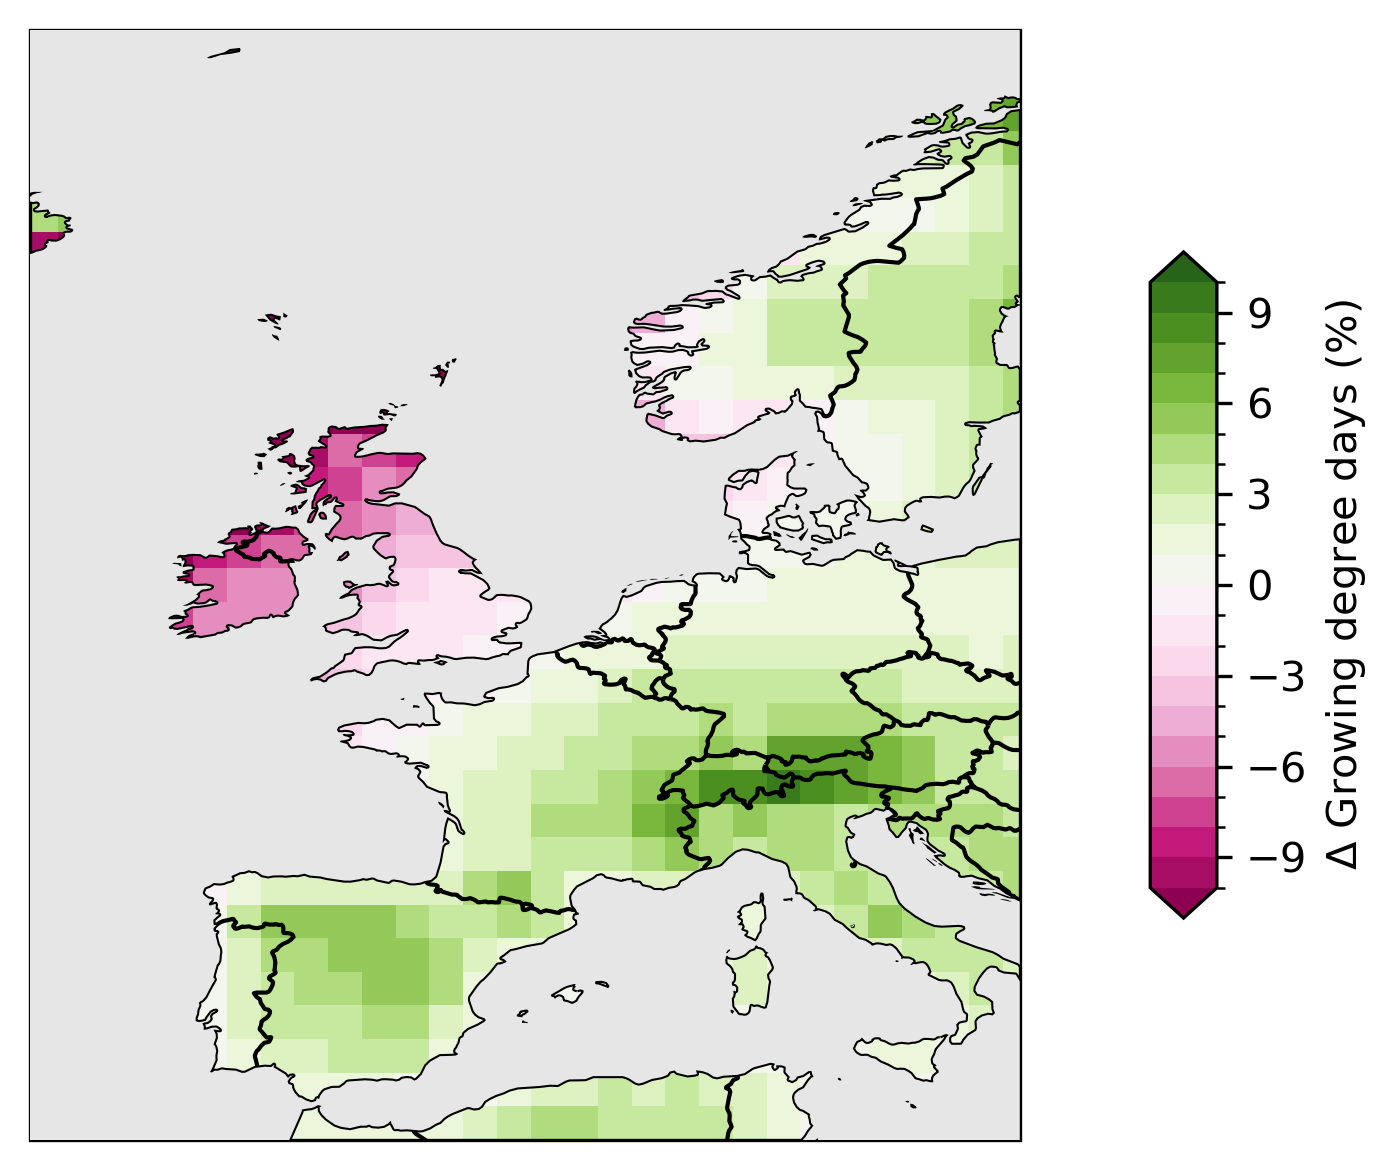

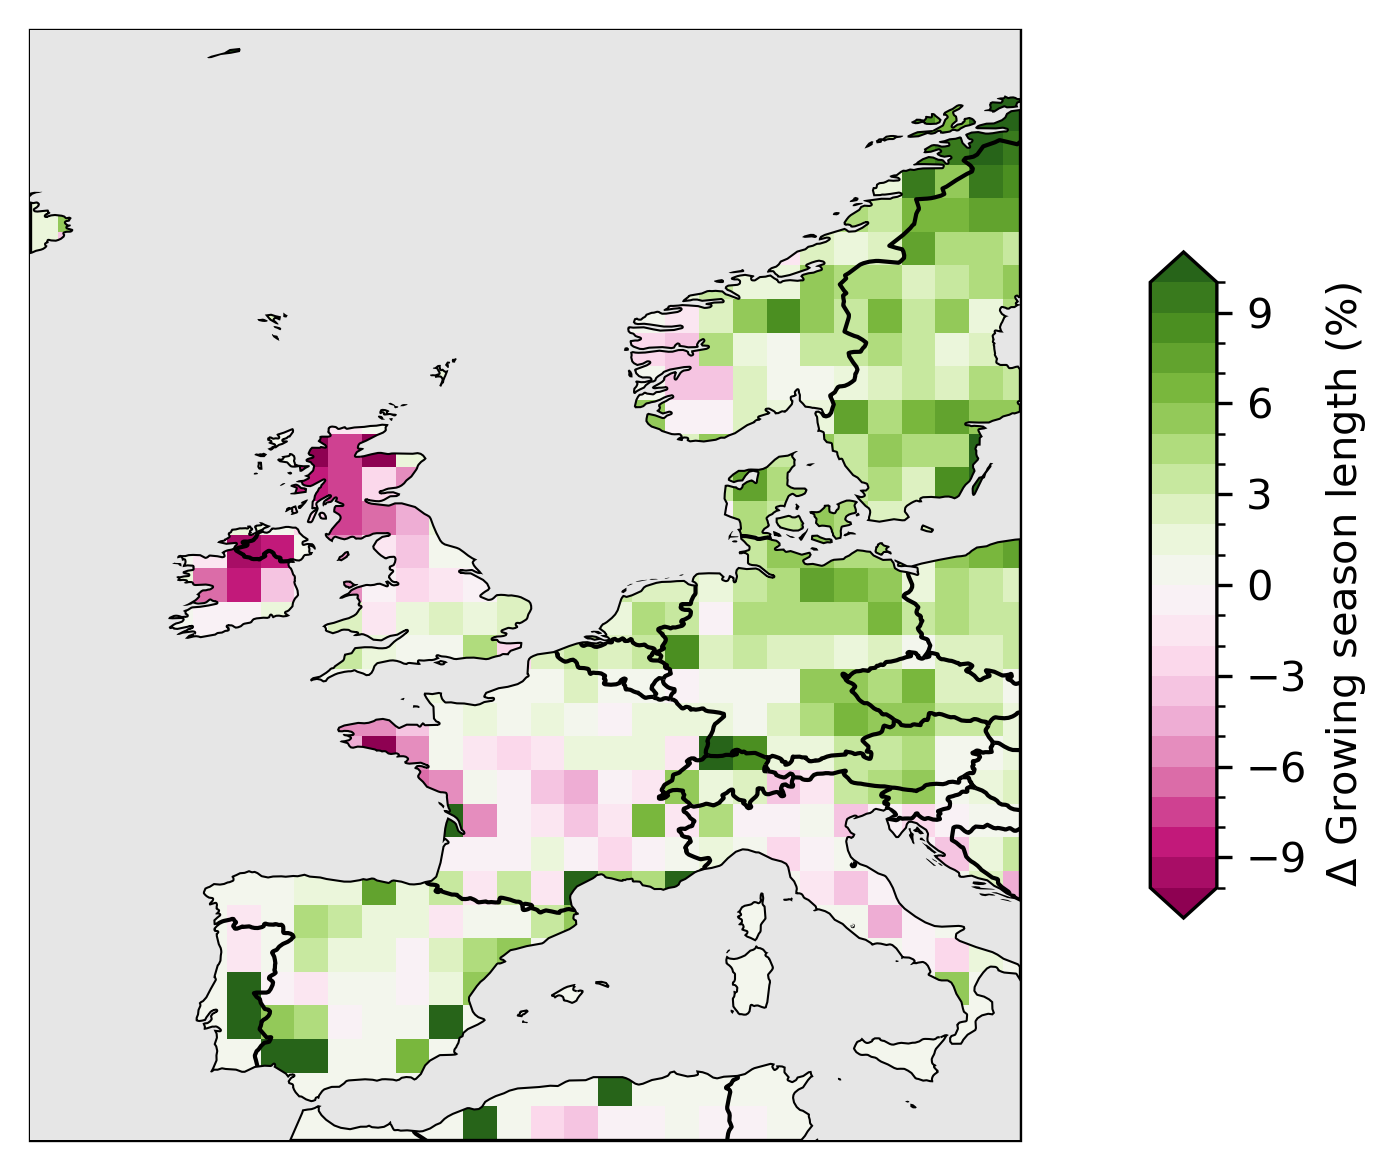

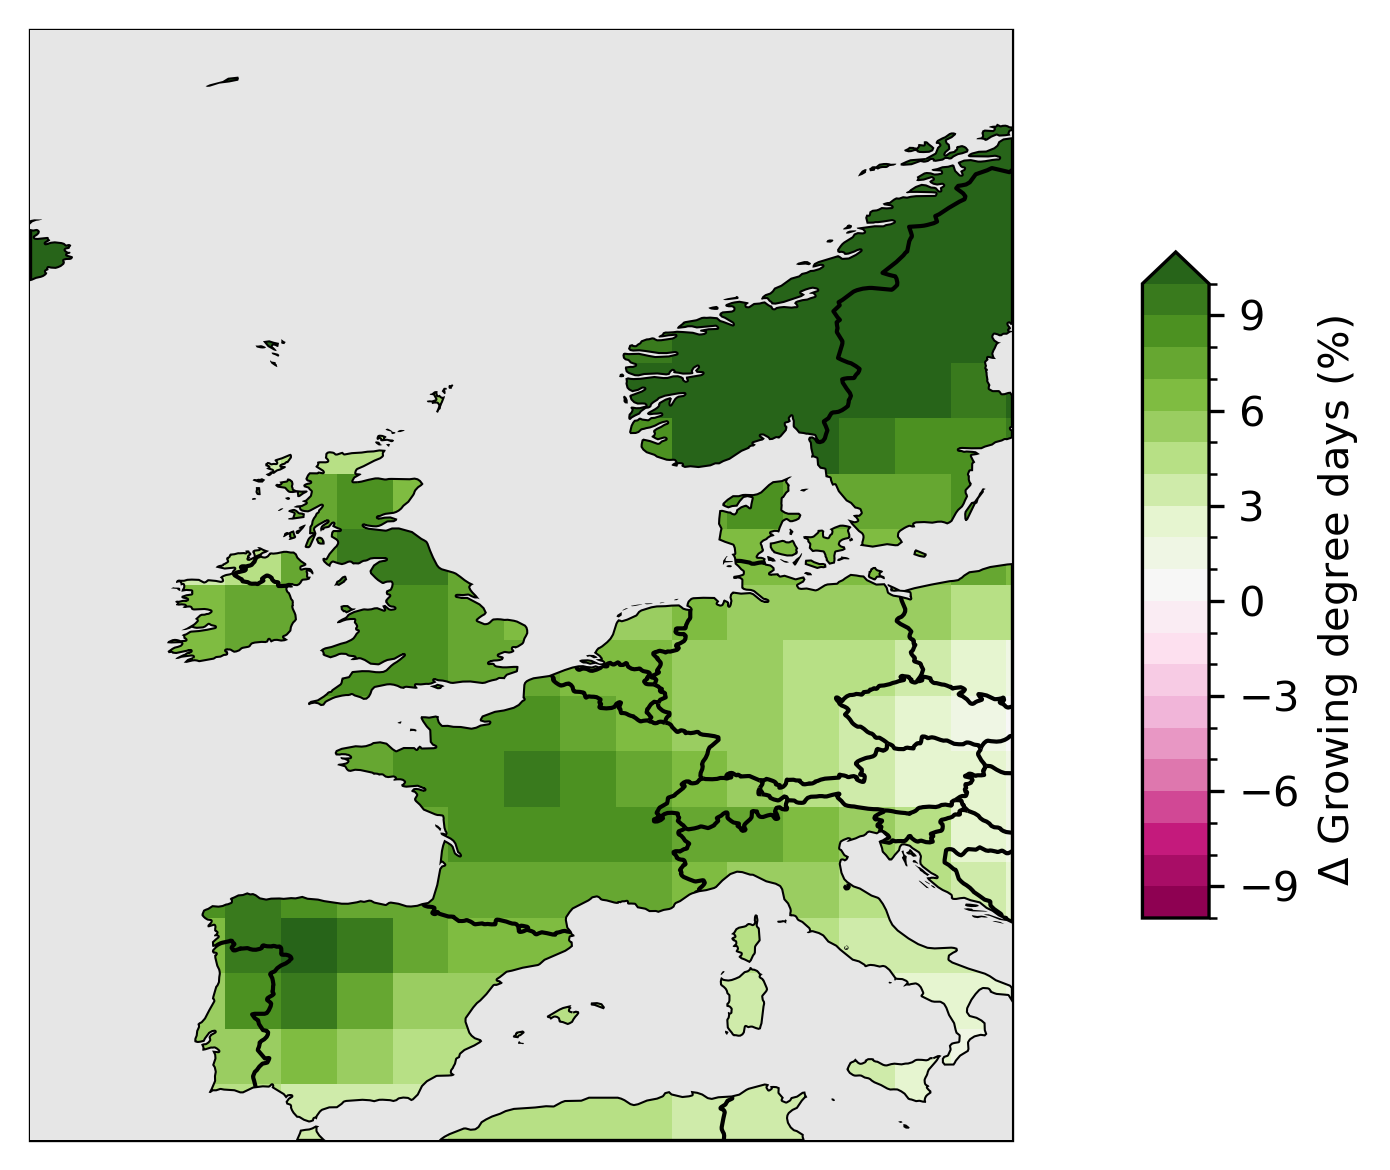

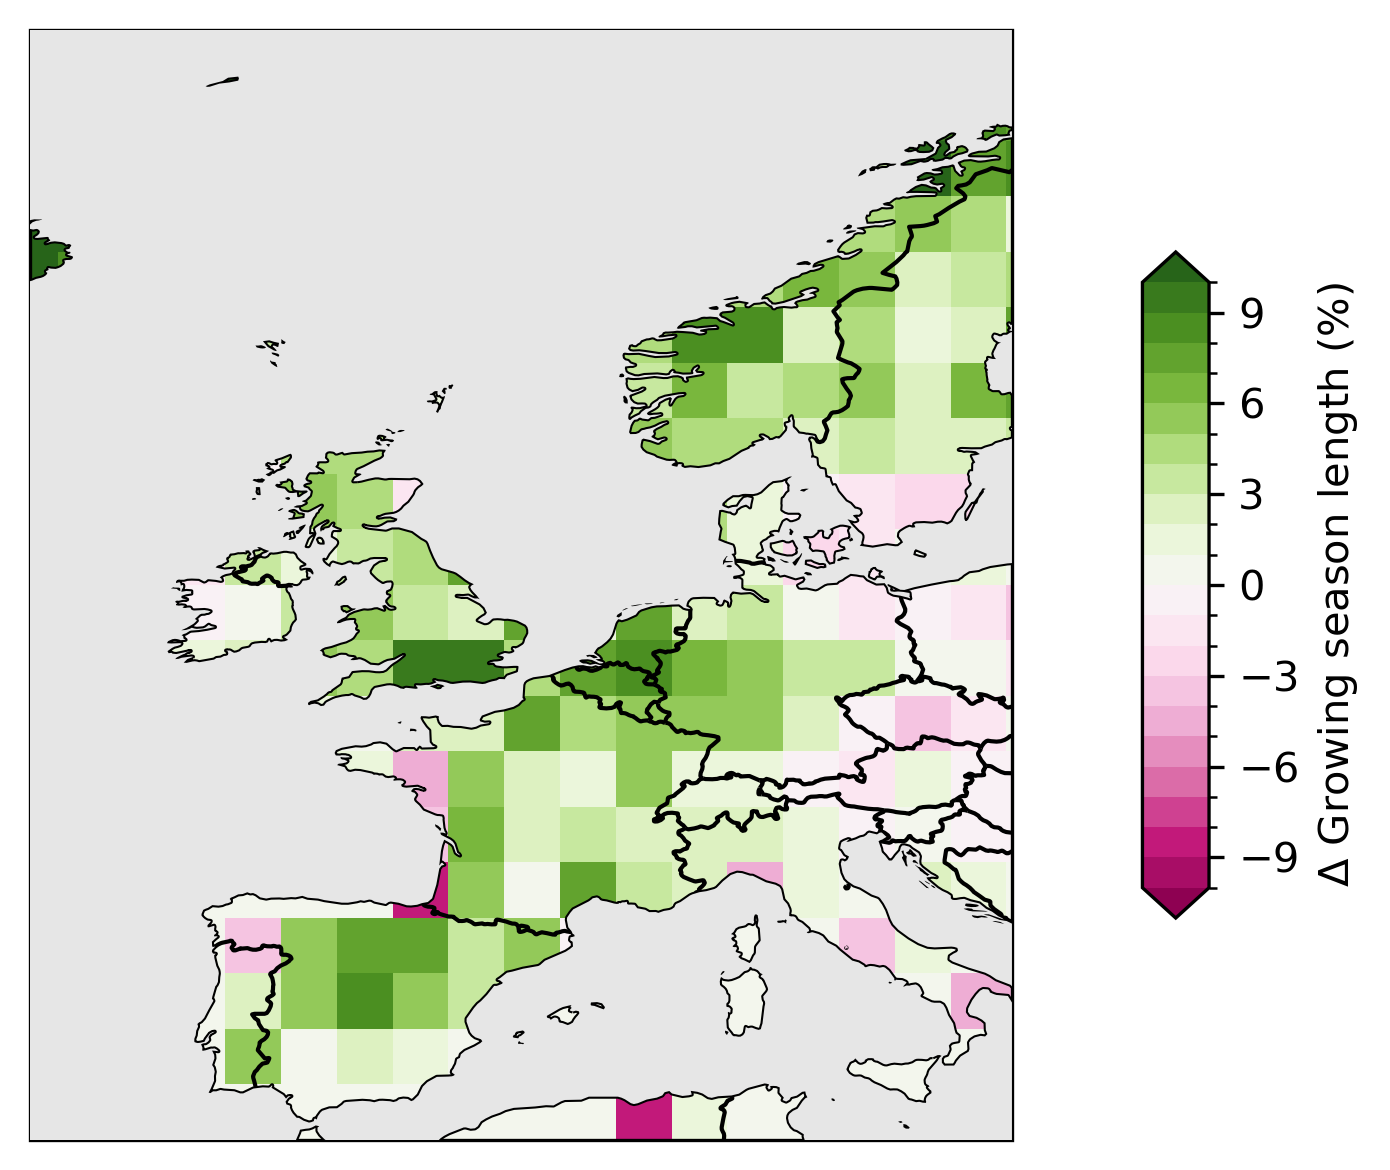

In [ ]:
data_folder = '../climatic_indices/'
area_name = 'europe'
model_scenario_names = ['MRI-ESM2-0_ssp245', 'MPI-ESM1-2-LR_ssp245']

for model_scenario_name in model_scenario_names:
    clim_idx = xr.open_mfdataset(data_folder+'*_'+area_name+'_'+model_scenario_name+'.nc', decode_timedelta=False)
    clim_idx.load()
    save_folder = '../figures/presentation/' # Folder where figures should be saved
    os.makedirs(save_folder, exist_ok=True) 

    # Choose variables

    variable_list=['GDD_v2', 'GSL_v3']
    reldiff = 'True'
    if reldiff == 'True':
        level_list = [10, 10]
        label_list = [' (%)', ' (%)']
    else:
        level_list = [100, 50]
        label_list = ['( $^{\circ}$C)', ' (days)']

    # Plotting

    for variable, lmax, label in zip(variable_list, level_list, label_list):
        levels = np.linspace(-lmax, lmax, 21)
        fig = plt.figure(figsize=[9, 4], dpi=300)
        ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
        ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
        diff = clim_idx[variable].isel(time=slice(25,45)).mean("time") - clim_idx[variable].isel(time=slice(5,25)).mean("time")
        if area_name == 'europe':
            diff = diff.reindex({'lon':np.arange(0, 360, clim_idx.lon[1]-clim_idx.lon[0])})
            ax.set_xlim([-15, 18])
        if reldiff == 'True':
            diff = diff/ clim_idx[variable].isel(time=slice(5,25)).mean("time") * 100
            label = '$\Delta$ '+clim_idx[variable].description + label
        else:
            label = '$\Delta$ '+ clim_idx[variable].description + label
        map = diff.plot(ax=ax, 
                    transform=ccrs.PlateCarree(),levels=levels, cmap='PiYG',
                    cbar_kwargs={'orientation':'vertical','shrink':0.6, 'aspect':10,'label':label})
        ax.coastlines()
        ax.add_feature(cFeature.BORDERS,)
        ax.add_feature(cFeature.OCEAN,zorder=10,facecolor=(0.9,0.9,0.9))
        fig.tight_layout()
        if reldiff == 'True':
            plt.savefig(save_folder+'reldiff_'+variable+'_'+area_name+'_'+model_scenario_name+'.png')
        else:
            plt.savefig(save_folder+'diff_'+variable+'_'+area_name+'_'+model_scenario_name+'.png')
        plt.show()

<Figure size 2700x1200 with 0 Axes>

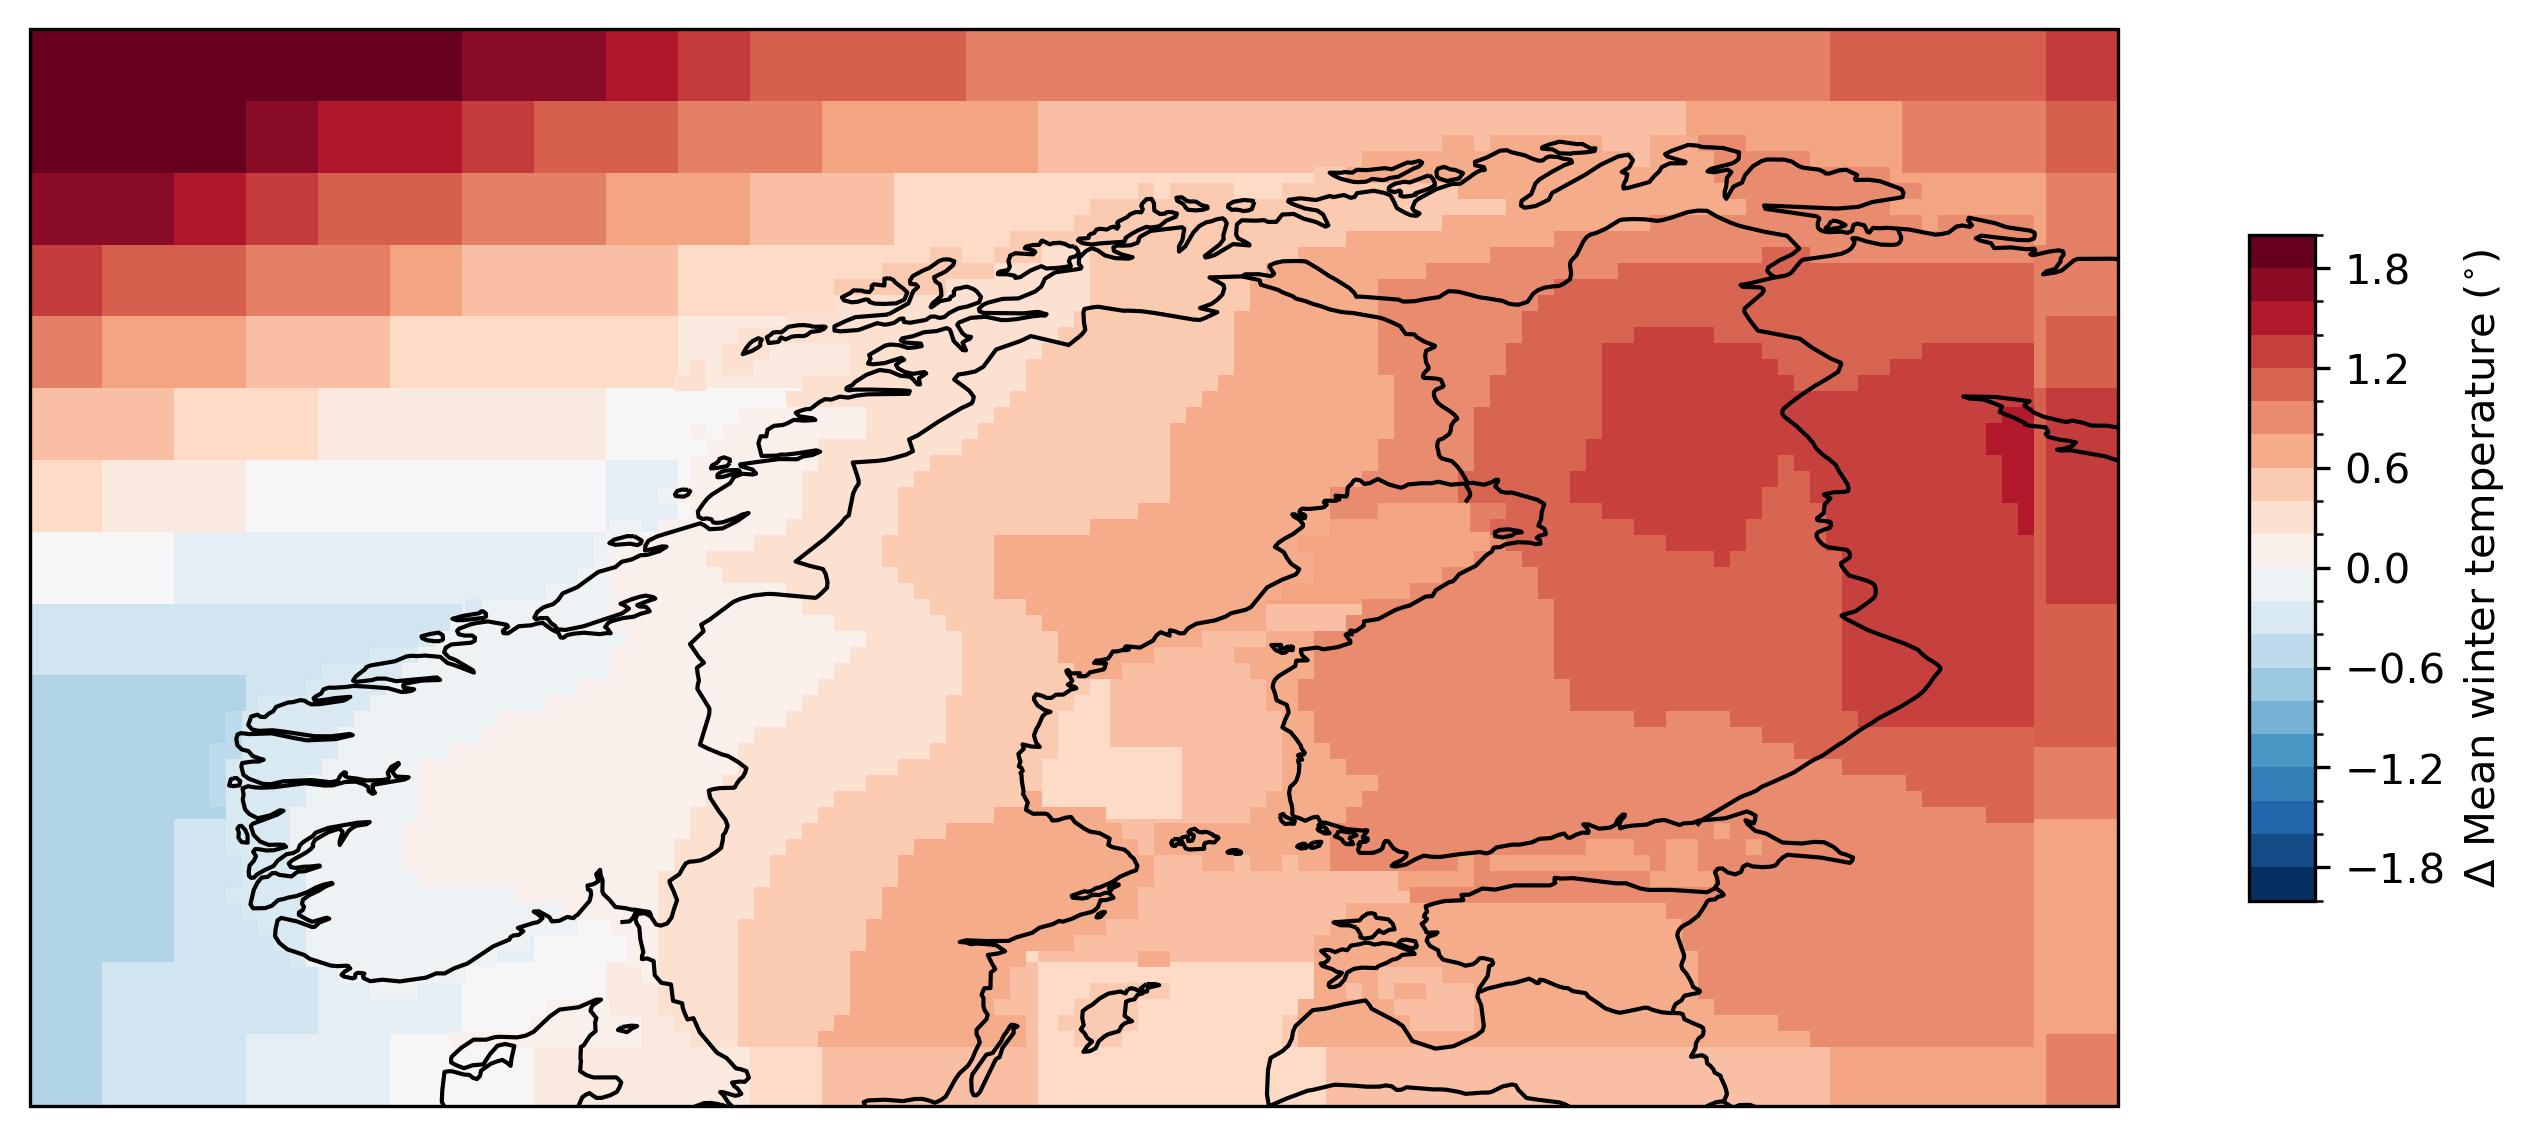

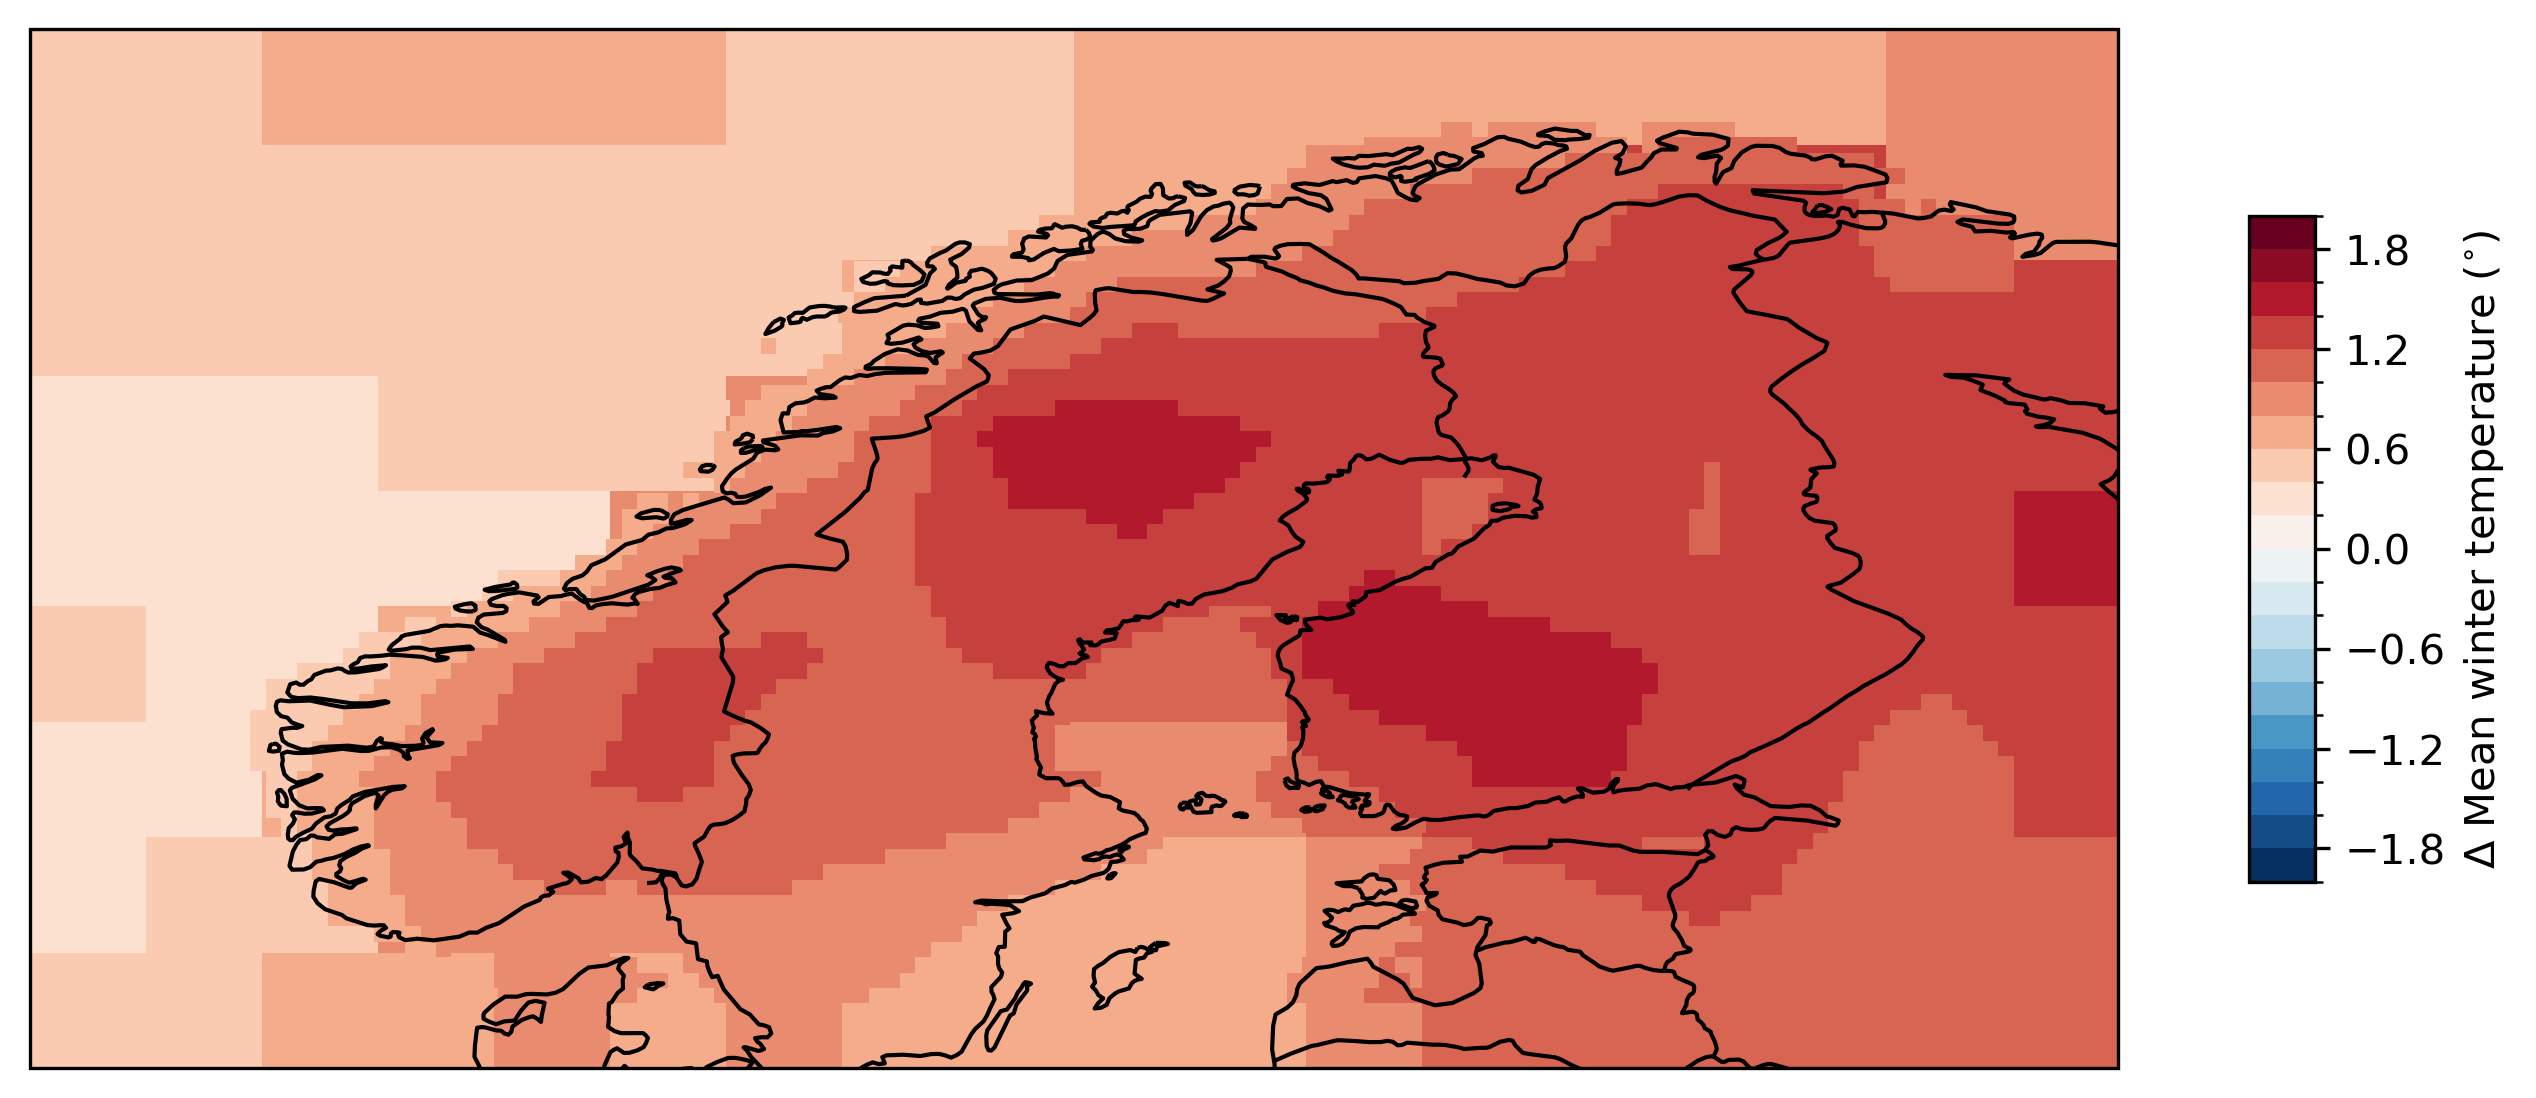

In [7]:
save_folder = '../figures/maps/oslo/' # Folder where figures should be saved
os.makedirs(save_folder, exist_ok=True) 

# Choose model scenario and area

data_folder = '../NASA_data/'
data_folder_CMIP6 = '../CMIP6_data/'
start_time1 = '2020-01-01'; end_time1 = '2039-12-31'
start_time2 = '2040-01-01'; end_time2 = '2059-12-31'
area_name = 'norway'
model_scenario_names = ['MRI-ESM2-0_ssp245', 'MPI-ESM1-2-LR_ssp245']
variable = 'tas'
season = 'DJF'
lmax = 2
label = '$\Delta$ Mean winter temperature ($^{\circ}$)'

if area_name == 'norway':
    southern_lat = 57; northern_lat = 72
    western_lon = 2.5; eastern_lon = 33
elif area_name == 'germany':
    southern_lat = 46.5; northern_lat = 55.5
    western_lon = 5; eastern_lon = 15
elif area_name == 'global':
    southern_lat = -90; northern_lat = 90
    western_lon = 0; eastern_lon = 360

fig = plt.figure(figsize=[9, 4], dpi=300)
for model_scenario_name in model_scenario_names:

    #Plot downscaled data over land

    ds = xr.open_mfdataset(data_folder+variable+'_day_'+model_scenario_name+'*.nc', decode_timedelta=False)
    ds = ds[variable].sel(lat=slice(southern_lat, northern_lat), lon=slice(western_lon, eastern_lon))
    ds_pre = ds.sel(time=slice(start_time1, end_time1)).groupby('time.season').mean('time').sel(season=season)
    ds_post = ds.sel(time=slice(start_time2, end_time2)).groupby('time.season').mean('time').sel(season=season)
    
    diff = ds_post - ds_pre

    # Plot ocean temperature data from CMIP6 data

    ds_o = xr.open_mfdataset(data_folder_CMIP6+variable+'_day_'+model_scenario_name+'*.nc', decode_timedelta=False)
    ds_o = ds_o[variable].sel(lat=slice(southern_lat-1, northern_lat+1), lon=slice(western_lon-1, eastern_lon+1))
    ds_o_pre = ds_o.sel(time=slice(start_time1, end_time1)).groupby('time.season').mean('time').sel(season=season)
    ds_o_post = ds_o.sel(time=slice(start_time2, end_time2)).groupby('time.season').mean('time').sel(season=season)
    
    diff_o = ds_o_post - ds_o_pre


    levels = np.linspace(-lmax, lmax, 21)
    fig = plt.figure(figsize=[9, 4], dpi=300)
    ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
    map_o = diff_o.plot(ax=ax, 
                transform=ccrs.PlateCarree(),levels=levels,
                add_colorbar=False)
    map = diff.plot(ax=ax, 
                transform=ccrs.PlateCarree(),levels=levels,
                cbar_kwargs={'orientation':'vertical','shrink':0.6, 'aspect':10,'label':label})
    ax.coastlines()
    ax.add_feature(cFeature.BORDERS)
    ax.set_title('')

    ax.spines[['right','top']].set_visible(False)
    fig.tight_layout()
    plt.savefig(save_folder+'diff_'+variable+'_'+area_name+'_'+model_scenario_name+'_downscaled.png')
    plt.show()

/tmp/ipykernel_367184/875668820.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


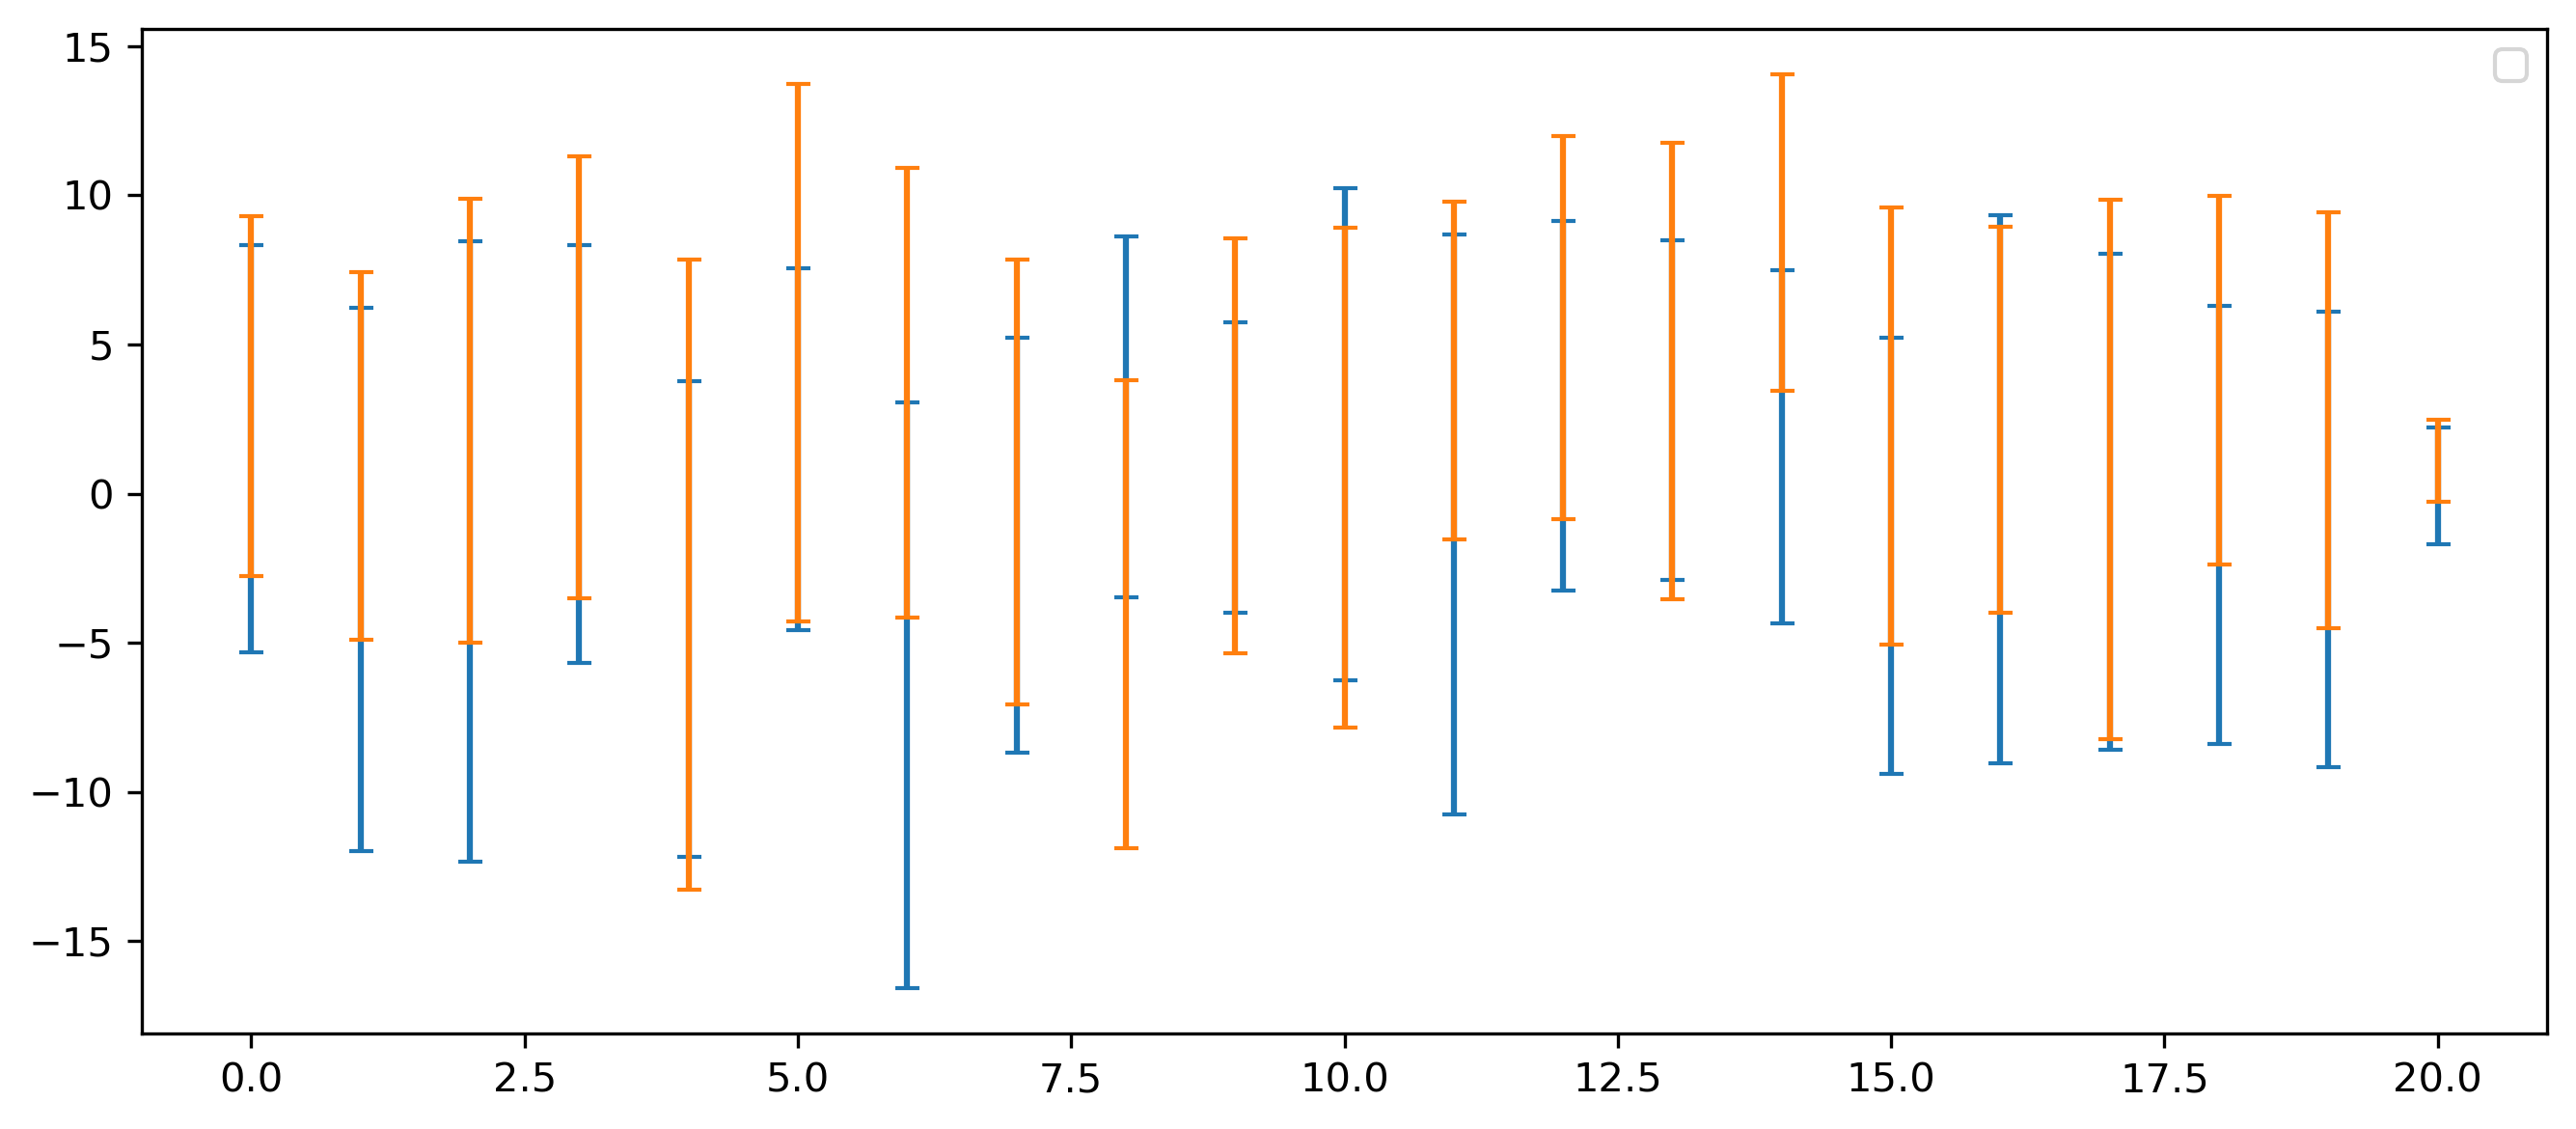

In [ ]:
save_folder = '../figures/maps/oslo/' # Folder where figures should be saved
os.makedirs(save_folder, exist_ok=True) 

# Choose model scenario and area

data_folder = '../NASA_data/'
start_time1 = '2015-01-01'; end_time1 = '2034-12-31'
start_time2 = '2040-01-01'; end_time2 = '2059-12-31'
area_name = 'southern_norway'
model_scenario_names = ['MRI-ESM2-0_ssp245', 'MPI-ESM1-2-LR_ssp245']
variable = 'tas'
season = 'DJF'
reldiff = False
lmax = 2
label = '$\Delta$ Mean winter temperature ($^{\circ}$)'

if area_name == 'norway':
    southern_lat = 57; northern_lat = 72
    western_lon = 2.5; eastern_lon = 33
if area_name == 'southern_norway':
    southern_lat = 57.9; northern_lat = 62.9
    western_lon = 2.5; eastern_lon = 11.3
elif area_name == 'germany':
    southern_lat = 46.5; northern_lat = 55.5
    western_lon = 5; eastern_lon = 15
elif area_name == 'global':
    southern_lat = -90; northern_lat = 90
    western_lon = 0; eastern_lon = 360

fig = plt.figure(figsize=[9, 4], dpi=300)
for model_scenario_name, color in zip(model_scenario_names, ['tab:blue', 'tab:orange']):
    ds = xr.open_mfdataset(data_folder+variable+'_day_'+model_scenario_name+'*.nc', decode_timedelta=False)
    ds = ds[variable].sel(lat=slice(southern_lat, northern_lat), lon=slice(western_lon, eastern_lon)).mean(['lat', 'lon'])
    ds_pre = ds.sel(time=slice(start_time1, end_time1)).groupby('time.season').mean('time').sel(season=season)
    ds_post = ds.sel(time=slice(start_time2, end_time2)) - ds_pre
    ds_post.load()
    for year in range(21):
        ds_post_i = ds_post.isel(time=slice(year*365,(year+1)*365))
        ds_post_mean = ds_post_i.groupby('time.season').mean('time').sel(season=season)
        ds_post_max = ds_post_i.groupby('time.season').max('time').sel(season=season)
        ds_post_min = ds_post_i.groupby('time.season').min('time').sel(season=season)
        plt.errorbar(year, ds_post_mean, yerr=[[np.abs(ds_post_min)], [np.abs(ds_post_max)]], color=color, capsize=3.0)
    
    #diff = ds_post[variable] - ds_pre[variable]
    #plt.plot(ds.time.sel(time=slice(start_time1, end_time2)), ds[variable].sel(time=slice(start_time1, end_time2)), label=model_scenario_name)
ax.set_title('')

ax.spines[['right','top']].set_visible(False)
fig.tight_layout()
plt.legend()
    #    plt.savefig(save_folder+'avg_diff_'+variable+'_'+season+'_'+area_name+'_'+model_scenario_name+'_downscaled.png')
plt.show()